## Group Project For analysing given dataset using Python Libraries (numpy, pandas, seaborn, matplotlib)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("ds_salaries.csv")
df = df.iloc[:, 1:]
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 1. Exploring the dataset

In [3]:
df.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salar

# 2. What are the best paying roles & what is the median salary for data scientists?

In [6]:
job_sal = df.groupby('job_title')['salary'].agg({'count', 'mean'}).round()
job_sal = job_sal[job_sal['count']>3].sort_values(by = 'mean', ascending = True).reset_index()
job_sal['Avg Salary'] = job_sal['mean'].apply(lambda x: "${:.1f}k".format(x/1000))
job_sal.drop('mean', axis = 1, inplace = True)
job_sal

,job_title,count,Avg Salary
0,Data Analytics Engineer,4,$61.8k
1,Computer Vision Engineer,6,$83.5k
2,Data Analyst,97,$96.6k
3,Research Scientist,16,$110.5k
4,Data Engineering Manager,5,$119.8k
5,Data Science Consultant,7,$122.7k
6,Data Analytics Manager,7,$127.1k
7,Lead Data Engineer,6,$140.3k
8,Applied Machine Learning Scientist,4,$141.3k
9,Head of Data Science,4,$146.7k


In [7]:
ds = df[df['job_title']=='Data Scientist']
print('The median salary for a Data Scientist is:', '$',+int(ds['salary'].median()))

The median salary for a Data Scientist is: $ 120160


# 3. Looking at the breakdown of remote work 

- 0 - No remote work (less than 20%) 
- 50 - Partially remote 
- 100 - Fully remote (more than 80%)

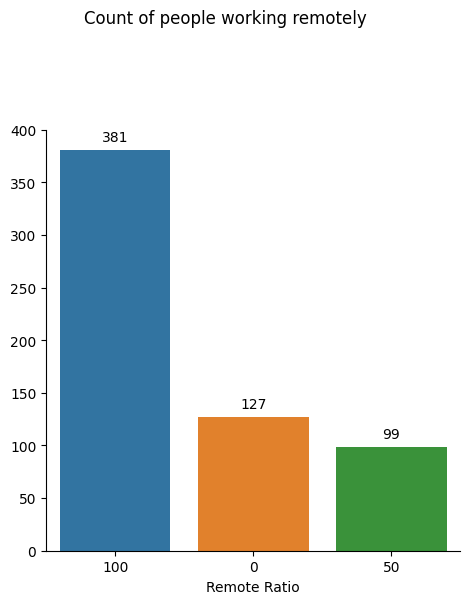

In [8]:
b = sns.catplot(x = 'remote_ratio', kind = 'count', data = df, order = df['remote_ratio'].value_counts().index)
b.set(xlabel = 'Remote Ratio', ylabel = '')
b.fig.suptitle(t = "Count of people working remotely", y = 1.2)
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 9), textcoords = 'offset points')

# 4. Looking at the breakdown of employment type

- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

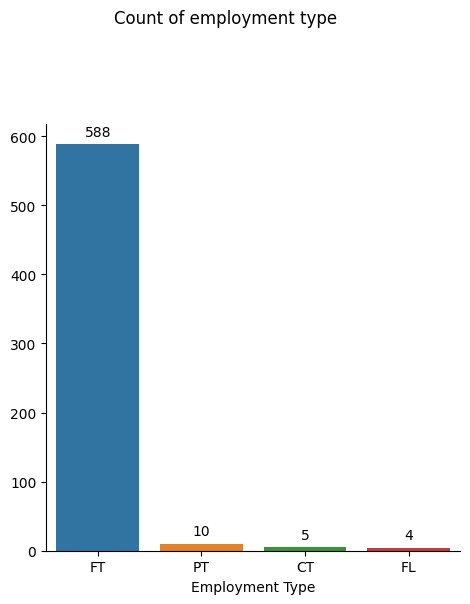

In [9]:
#Looking at the breakdown of employment opportunities
#PT Part-time FT Full-time CT Contract FL Freelance

b = sns.catplot(x = 'employment_type', kind = 'count', data = df, order = df['employment_type'].value_counts().index)
b.set(xlabel = 'Employment Type', ylabel = '')
b.fig.suptitle(t = "Count of employment type", y = 1.2)
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 9), textcoords = 'offset points')

## 5.Grouping pay into different buckets 

In [10]:
#Grouping pay into different buckets
print("The highest salary is :", df['salary_in_usd'].max())
print("The lowest salary is :", df['salary_in_usd'].min())

def pay(x):
    if x < 45000:
        return '<45K'
    elif x < 80000:
        return '<80K'
    elif x < 200000:
        return '<200K'
    else:
        return '>200K'
            
pay_index = [['<45', '<80k', '<200k', '>200k']]
df['pay'] = df['salary_in_usd'].apply(pay)
pay_percent = df['pay'].value_counts(normalize = True)
pay_percent
#pay_percent.reindex(pay_index)

The highest salary is : 600000
The lowest salary is : 2859


<200K    0.540362
<80K     0.214168
<45K     0.140033
>200K    0.105437
Name: pay, dtype: float64

# 6.Salary distribution in the dataset. 

<AxesSubplot: title={'center': 'Histogram of salary in USD'}, xlabel='Salary (USD)'>

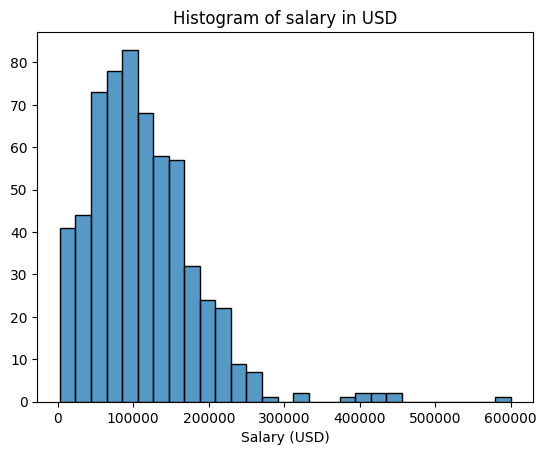

In [11]:
#Looking at the salary distribution in the dataset. 
g = sns.histplot(df['salary_in_usd'])
g.set(xlabel = 'Salary (USD)', ylabel = '', title = 'Histogram of salary in USD')
g